# Import Libraries

In [297]:
import cv2
import numpy as np
import heapq
import random
from matplotlib import pyplot as plt

# Input image and preparations

Text(0.5, 1.0, 'GreyScale Image')

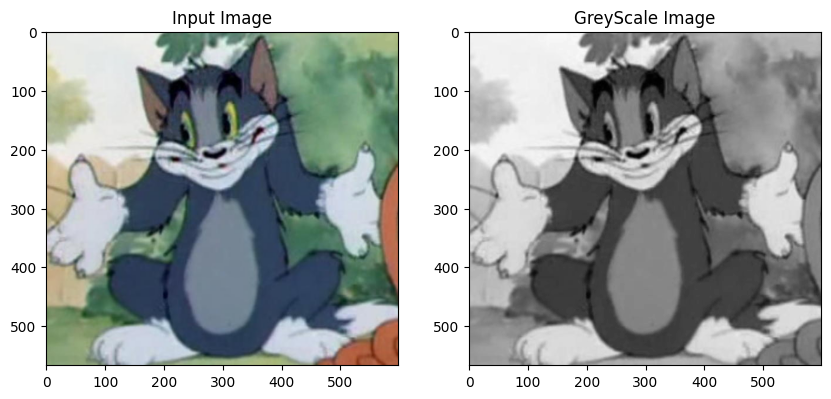

In [298]:
inputFilePath = 'C:\\NYP\\Assets\\shruggingTom.png'
img = cv2.cvtColor(cv2.imread(inputFilePath), cv2.COLOR_BGR2RGB)

greyscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
outputFilePath = 'C:\\NYP\\Assets\\greyscaleImg.png'
cv2.imwrite(outputFilePath, greyscale)

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Input Image')


fig.add_subplot(1, 2, 2)
plt.imshow(greyscale, cmap='gray')
plt.title('GreyScale Image')

In [299]:
resizeScale = 50
width = int(greyscale.shape[1] * resizeScale / 100)
height = int(greyscale.shape[0] * resizeScale / 100)
dim = (width, height)

True

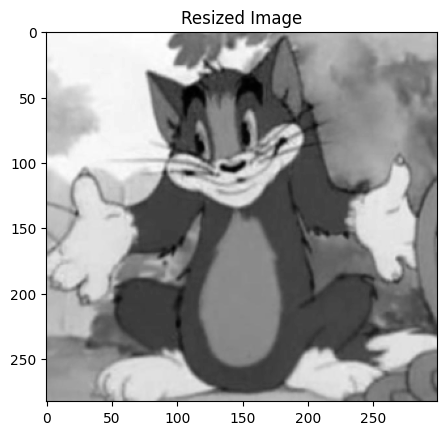

In [300]:
resizedImg = cv2.resize(greyscale, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resizedImg, cmap = 'gray')
plt.title('Resized Image')
outputFilePath = 'C:\\NYP\\Assets\\resizedImg.png'
cv2.imwrite(outputFilePath, resizedImg)

In [301]:
height = resizedImg.shape[0]
width = resizedImg.shape[1]
numPixel = height * width

In [302]:
height, width, numPixel

(283, 299, 84617)

In [303]:
resizedImg, resizedImg.shape

(array([[237, 236, 235, ..., 181, 180, 177],
        [236, 236, 235, ..., 181, 180, 177],
        [235, 235, 234, ..., 180, 180, 178],
        ...,
        [147, 148, 149, ..., 118, 118, 117],
        [149, 149, 150, ..., 119, 118, 118],
        [150, 151, 152, ..., 116, 116, 117]], dtype=uint8),
 (283, 299))

# Matrix construction

In [304]:
adjMatrix = np.full((numPixel, numPixel), fill_value = -1, dtype = int)
adjMatrix

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [305]:
#downleft
def downLeft(y, x):
    target=(y+1, x-1)
    adjMatrix[y*width+x][target[0]*width+target[1]] = abs(int(resizedImg[y][x]) - int(resizedImg[target[0]][target[1]]))
    
#down
def down(y, x):
    target=(y+1, x)
    adjMatrix[y*width+x][target[0]*width+target[1]] = abs(int(resizedImg[y][x]) - int(resizedImg[target[0]][target[1]]))
    
#downright
def downRight(y, x):
    target=(y+1, x+1)
    adjMatrix[y*width+x][target[0]*width+target[1]] = abs(int(resizedImg[y][x]) - int(resizedImg[target[0]][target[1]]))

#right
def right(y, x):
    target=(y, x+1)
    adjMatrix[y*width+x][target[0]*width+target[1]] = abs(int(resizedImg[y][x]) - int(resizedImg[target[0]][target[1]]))

In [306]:
for x in range(width):
    for y in range(height):
        if x > 0 and y < height-1:
            downLeft(y, x)
        if y < height-1:
            down(y, x)
        if x < width-1 and y < height-1:
            downRight(y, x) 
        if x < width-1:
            right(y, x)
adjMatrix

array([[-1,  1, -1, ..., -1, -1, -1],
       [-1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1,  0, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [307]:
edge = 0
for i in adjMatrix:
    for j in i:
        if j != -1:
            edge += 1
print(edge)

336724


# MST finding algorithms and find the MST from the matrix

In [308]:
#Kruskal's algorithm
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)
    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1



def kruskals(graph):
    n = graph.shape[0]
    edges = [(i, j, graph[i][j]) for i in range(n) for j in range(i+1, n) if graph[i][j] != -1]
    edges.sort(key=lambda x: x[2])

    parent = [i for i in range(n)]
    rank = [0] * n

    MST = []
    for u, v, w in edges:
        u_root = find(parent, u)
        v_root = find(parent, v)
        if u_root != v_root:
            MST.append((u, v, w))
            union(parent, rank, u_root, v_root)

    return MST

#Prim's algorithm
def prims(graph):
    n = graph.shape[0]
    inf = np.inf
    key = [inf] * n
    parent = [-1] * n
    in_mst = [False] * n

    pq = [(0, 0)]  # Start with vertex 0 (weight, vertex)
    key[0] = 0

    while pq:
        _, current_vertex = heapq.heappop(pq)
        if in_mst[current_vertex]:
            continue  # Skip if already included in MST
        in_mst[current_vertex] = True  # Mark this vertex as included in MST

        # Explore edges from the current vertex to other vertices
        for next_vertex in range(n):
            if current_vertex < next_vertex:
                weight = graph[current_vertex][next_vertex]
            else:
                weight = graph[next_vertex][current_vertex]

            if weight >= 0 and not in_mst[next_vertex] and key[next_vertex] > weight:
                key[next_vertex] = weight
                parent[next_vertex] = current_vertex
                heapq.heappush(pq, (key[next_vertex], next_vertex))

    # Construct the MST using the parent array
    MST = [(parent[v], v, key[v]) for v in range(1, n) if parent[v] != -1]

    return MST

#Boruvka's algorithm
def boruvkas(graph):
    n = graph.shape[0]
    parent = list(range(n))
    rank = [0] * n
    MST = []

    def find(i):
        if parent[i] != i:
            parent[i] = find(parent[i])
        return parent[i]

    def union(x, y):
        rootx = find(x)
        rooty = find(y)
        if rootx != rooty:
            if rank[rootx] > rank[rooty]:
                parent[rooty] = rootx
            else:
                parent[rootx] = rooty
                if rank[rootx] == rank[rooty]:
                    rank[rooty] += 1

    numTrees = n

    while numTrees > 1:
        cheapest = [(-1, -1, np.inf)] * n  # (u, v, weight)

        # Find the cheapest edge for each component.
        for i in range(n):
            for j in range(i+1, n):  # Consider upper triangle only
                weight = graph[i][j]
                if weight != -1:
                    i_root = find(i)
                    j_root = find(j)
                    if i_root != j_root:
                        if cheapest[i_root][2] > weight:
                            cheapest[i_root] = (i, j, weight)
                        if cheapest[j_root][2] > weight:
                            cheapest[j_root] = (i, j, weight)

        # Add the cheapest edges to the MST (avoiding duplicates and cycles).
        for i in range(n):
            u, v, weight = cheapest[i]
            if u != -1 and find(u) != find(v):
                union(u, v)
                MST.append((u, v, weight))
                numTrees -= 1

        # Check if no edges were added, which means we cannot proceed further.
        if not any(u != -1 for u, v, weight in cheapest):
            break

    return MST


In [309]:
MST_K = sorted(kruskals(adjMatrix))
MST_K

[(0, 1, 1),
 (1, 2, 1),
 (1, 299, 0),
 (1, 300, 0),
 (2, 3, 0),
 (2, 301, 0),
 (2, 302, 1),
 (3, 4, 0),
 (4, 5, 0),
 (5, 6, 0),
 (6, 7, 0),
 (7, 8, 0),
 (8, 9, 0),
 (9, 10, 0),
 (10, 11, 0),
 (12, 13, 0),
 (12, 310, 0),
 (12, 311, 0),
 (12, 312, 0),
 (13, 14, 0),
 (13, 313, 0),
 (14, 15, 0),
 (14, 314, 0),
 (15, 16, 1),
 (16, 17, 1),
 (16, 315, 0),
 (16, 316, 0),
 (17, 18, 0),
 (17, 317, 0),
 (18, 19, 1),
 (18, 318, 0),
 (19, 20, 0),
 (20, 21, 0),
 (21, 22, 0),
 (22, 23, 0),
 (22, 322, 0),
 (23, 24, 1),
 (24, 25, 1),
 (24, 323, 0),
 (25, 26, 1),
 (25, 324, 0),
 (26, 27, 0),
 (26, 325, 0),
 (26, 326, 0),
 (27, 28, 0),
 (27, 327, 1),
 (28, 29, 0),
 (29, 30, 0),
 (30, 31, 1),
 (30, 330, 0),
 (31, 32, 0),
 (32, 33, 0),
 (33, 34, 0),
 (34, 35, 0),
 (35, 36, 0),
 (36, 37, 0),
 (37, 38, 0),
 (38, 39, 0),
 (39, 40, 0),
 (39, 339, 0),
 (40, 41, 1),
 (40, 340, 0),
 (41, 42, 0),
 (41, 341, 0),
 (42, 43, 1),
 (42, 342, 0),
 (43, 44, 0),
 (44, 45, 0),
 (45, 46, 0),
 (46, 47, 0),
 (47, 48, 0),
 (49,

In [310]:
MST_P = sorted(prims(adjMatrix))
MST_P

[(0, 1, 1),
 (1, 2, 1),
 (1, 299, 0),
 (1, 300, 0),
 (2, 3, 0),
 (2, 301, 0),
 (3, 4, 0),
 (4, 5, 0),
 (5, 6, 0),
 (6, 7, 0),
 (7, 8, 0),
 (8, 9, 0),
 (9, 10, 0),
 (10, 11, 0),
 (11, 12, 1),
 (12, 13, 0),
 (12, 310, 0),
 (12, 311, 0),
 (12, 312, 0),
 (13, 14, 0),
 (13, 313, 0),
 (14, 15, 0),
 (14, 314, 0),
 (15, 16, 1),
 (16, 17, 1),
 (16, 315, 0),
 (16, 316, 0),
 (17, 18, 0),
 (17, 317, 0),
 (18, 19, 1),
 (18, 318, 0),
 (19, 20, 0),
 (20, 21, 0),
 (21, 22, 0),
 (22, 23, 0),
 (22, 322, 0),
 (23, 24, 1),
 (24, 25, 1),
 (24, 323, 0),
 (25, 26, 1),
 (25, 324, 0),
 (26, 27, 0),
 (26, 325, 0),
 (26, 326, 0),
 (27, 28, 0),
 (27, 327, 1),
 (28, 29, 0),
 (29, 30, 0),
 (30, 31, 1),
 (30, 330, 0),
 (31, 32, 0),
 (32, 33, 0),
 (33, 34, 0),
 (34, 35, 0),
 (35, 36, 0),
 (36, 37, 0),
 (37, 38, 0),
 (38, 39, 0),
 (39, 40, 0),
 (39, 339, 0),
 (40, 41, 1),
 (40, 340, 0),
 (41, 42, 0),
 (41, 341, 0),
 (42, 43, 1),
 (42, 342, 0),
 (43, 44, 0),
 (44, 45, 0),
 (45, 46, 0),
 (46, 47, 0),
 (47, 48, 0),
 (51,

In [311]:
MST_B = sorted(boruvkas(adjMatrix))
MST_B

[(0, 1, 1),
 (1, 2, 1),
 (1, 299, 0),
 (1, 300, 0),
 (2, 3, 0),
 (2, 301, 0),
 (2, 302, 1),
 (3, 4, 0),
 (4, 5, 0),
 (5, 6, 0),
 (6, 7, 0),
 (7, 8, 0),
 (8, 9, 0),
 (9, 10, 0),
 (10, 11, 0),
 (12, 13, 0),
 (12, 310, 0),
 (12, 311, 0),
 (12, 312, 0),
 (13, 14, 0),
 (13, 313, 0),
 (14, 15, 0),
 (14, 314, 0),
 (15, 16, 1),
 (16, 17, 1),
 (16, 315, 0),
 (16, 316, 0),
 (17, 18, 0),
 (17, 317, 0),
 (18, 19, 1),
 (18, 318, 0),
 (19, 20, 0),
 (20, 21, 0),
 (21, 22, 0),
 (22, 23, 0),
 (22, 322, 0),
 (23, 24, 1),
 (24, 25, 1),
 (24, 323, 0),
 (25, 26, 1),
 (25, 324, 0),
 (26, 27, 0),
 (26, 325, 0),
 (26, 326, 0),
 (27, 28, 0),
 (27, 327, 1),
 (28, 29, 0),
 (29, 30, 0),
 (30, 31, 1),
 (30, 330, 0),
 (31, 32, 0),
 (32, 33, 0),
 (33, 34, 0),
 (34, 35, 0),
 (35, 36, 0),
 (36, 37, 0),
 (37, 38, 0),
 (38, 39, 0),
 (39, 40, 0),
 (39, 339, 0),
 (40, 41, 1),
 (40, 340, 0),
 (41, 42, 0),
 (41, 341, 0),
 (42, 43, 1),
 (42, 342, 0),
 (43, 44, 0),
 (44, 45, 0),
 (45, 46, 0),
 (46, 47, 0),
 (47, 48, 0),
 (49,

# Check if the MSTs included all vertices and with minimum weight

In [312]:
def is_tree(mst, n):
    if len(mst) != n - 1:  # A tree must have exactly n-1 edges
        return False
    # Check connectivity and absence of cycles using Union-Find
    parent = [i for i in range(n)]
    def find(i):
        if parent[i] != i:
            parent[i] = find(parent[i])
        return parent[i]
    for u, v, _ in mst:
        u_root = find(u)
        v_root = find(v)
        if u_root == v_root:  # Found a cycle
            return False
        parent[u_root] = v_root  # Union
    return True

def checkWeight(mst):
    return sum(weight for _, _, weight in mst)

def checkMST(graph, MST):
    n = graph.shape[0]
    if not is_tree(MST, n):
        return False
    givenWeight = checkWeight(MST)
    # Generate the correct MST using Kruskal's algorithm for comparison
    correctWeight = checkWeight(MST_K)
    # Verify the weight of the MST
    return givenWeight == correctWeight

In [313]:
Trees = [MST_K, MST_P, MST_B]

In [314]:
for tree in Trees:
    if is_tree(tree, width*height) and checkMST(adjMatrix, tree):
        print(True)

True
True
True


In [315]:
fixedMST = MST_B.copy()

In [316]:
len(MST_B)

84616

# Design a function to extract the trees from the MST and construct a MSF based on the logic of Boruvka's algorithm

In [327]:
pixelDiff = 3 # If difference between two pixels is less than this value, they are considered as in the same region
pixelDiff

3

In [318]:
def extractMSF(edges, diff):
    def isConnected(edge1, edge2):
        # Check if edges are connected and have a weight difference < 5
        return (edge1[0] == edge2[0] or edge1[0] == edge2[1] or
                edge1[1] == edge2[0] or edge1[1] == edge2[1]) and abs(edge1[2] - edge2[2]) < diff

    MSF = []  # 2D list to hold groups of nodes
    processed_edges = set()  # Keep track of processed edges to avoid duplication

    for i, current_edge in enumerate(edges):
        if i in processed_edges:
            continue  # Skip already processed edges
        current_group = set([current_edge[0], current_edge[1]])
        # Use a stack for DFS-like search for connected edges
        stack = [current_edge]

        while stack:
            edge = stack.pop()
            for j, other_edge in enumerate(edges):
                if j not in processed_edges and isConnected(edge, other_edge):
                    current_group.update([other_edge[0], other_edge[1]])
                    stack.append(other_edge)
                    processed_edges.add(j)  # Mark edge as processed

        MSF.append(list(current_group))

    return MSF

In [328]:
MST_B = fixedMST.copy()

In [329]:
MSF = extractMSF(MST_B, pixelDiff)
MSF

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  32900,
  32901,
  32902,
  32903,
  32904,
  32905,
  32906,
  32907,
  32908,
  32909,
  32910,
  32911,
  32940,
  32941,
  32942,
  32943,
  32944,
  32945,
  32946,
  32947,
  32948,
  32949,
  32950,
  32951,
  32952,
  299,
  300,
  301,
  302,
  303,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323,
  324,
  325,
  326,
 

# Image segmentation based on the constructed MSF list

Text(0.5, 1.0, 'Segmented Image')

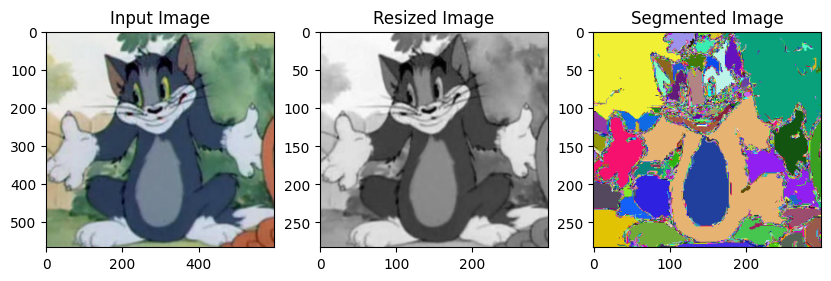

In [330]:
segImg = cv2.cvtColor(resizedImg,cv2.COLOR_GRAY2RGB)
for component in MSF:
    pixelColor = (random.randint(0,255),random.randint(0,255),random.randint(0,255))
    for nodes in component:
        segImg[int(nodes // width)][int(nodes % width)] = pixelColor

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
fig.add_subplot(1, 3, 2)
plt.imshow(resizedImg, cmap = 'gray')
plt.title('Resized Image')
fig.add_subplot(1, 3, 3)
plt.imshow(segImg)
plt.title('Segmented Image')

In [322]:
outputFilePath = 'C:\\NYP\\Assets\\segmentedImg.png'
cv2.imwrite(outputFilePath, segImg)

True